![](logoUdelS.png)

<div style="text-align: center">

## Doctorado en Sistemas Computacionales

### Seminario de Sistemas de Información para la Toma de decisiones

## Asesor:
### Dr. Gandhi Samuel Hernández

</div>

## INTEGRANTES
* PEREZ ESPARZA EDEL
* RODRIGUEZ RIVAS JOSE GABRIEL
* RODRIGUEZ ZUÑIGA MARCO ANTONIO  
</br>

<div style="text-align: center">
    
## ACTIVIDAD DE LA SEMANA 3
### Análisis de Datos

## DATASET  Avocado Prices
### https://www.kaggle.com/neuromusic/avocado-prices

### Procedencia
### https://hassavocadoboard.com

### Última actualización
### 2018-06-06

</div>

## Variables del dataset

El dataset contiene informacion historica de la venta de aguacate Hass en los Estados Unidos por region, y además contiene las ventas por tamaño del aguacate. También especifica si el aguacate es convencinal u orgánico

El aguacate tiene 2 formas de venta que se reflejan en el dataset:
* la venta de aguacate a granel y
* venta de aguacate en bolsa

Los conjuntos de datos contienen las siguientes variables de mayor importancia:

| Variable        | Descripcion |
| ----------------| ---------------------------------------------- |
| Date            | Fecha de la observacion                |
| AveragePrice  | Precio promedio de un aguacate           |
| Type          | Convencional u organico                |
| Total Volume  | Número total de aguacates vendidos      |
| # 4046          | Total de aguacates vendidos de tamaño: Small/Medium (~3-5oz avocado)  |
| # 4225          | Total de aguacates vendidos de tamaño: Large (~8-10oz avocado)        |
| # 4770          | Total de aguacates vendidos de tamaño: Extra Large (~10-15oz avocado)  |
| Region          | La region de la observacion            |


In [1]:
# Carga delibrerias
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Lectura del conjunto de datos
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Lo primero que observamos es que los nombres de columnas con respecto al tamaño
# del aguacate no son representativos para el usuario comun, por lo que se modificarán
# los nombes de las columnas (variables) para que sea mas representativo y fácil de
# entender

data = data.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Verificar número de observaciones y variables (renglones y columnas)
# contiene 18,249 observaciones con 14 variables
data.shape

(18249, 14)

In [5]:
# verificar si existen valores nulos en alguna variable
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
# Por ser un dataset con variables numéricas conviene ver los estadisticos
# descriptivos básicos
data.describe().round(2)

,Unnamed: 0,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [7]:
# verificar el tipo de varaibales usadas en el dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
Small Hass      18249 non-null float64
Large Hass      18249 non-null float64
XLarge Hass     18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [8]:
# como se puede observar la fecha tiene tipo de variable object por lo que
# la modificamos a tipo date y además, ordenamos el dataset en funcion de la fecha

data['Date'] =pd.to_datetime(data.Date)

data.sort_values(by=['Date'], inplace=True, ascending=True)

data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [9]:
# Observar la correlacion que puede existir entre las ventas totales y los
# tamaños de los aguacates a granel y en bolsa
data[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags',
      'XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,0.977863,0.920057
Large Hass,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,0.974181,0.905787
XLarge Hass,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,0.872202,0.792314
Small Bags,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,0.967238,0.994335
Large Bags,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,0.880640,0.943009
XLarge Bags,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,0.747157,0.804233
Total Volume,0.977863,0.974181,0.872202,0.967238,0.880640,0.747157,1.000000,0.963047
Total Bags,0.920057,0.905787,0.792314,0.994335,0.943009,0.804233,0.963047,1.000000


En el analisi de correlación anterior observamos que el aguacate **_Small_** y el aguacate **_Large_** estan fuertemente correlacionadas (.97)  con el volumen total de ventas de aguacate, y en cuanto a las ventas por bolsa, **_Small Bags_** y el aguacate **_Large Bags_** estan fuertemente correlacionadas (.99) y (.94) respectivamente

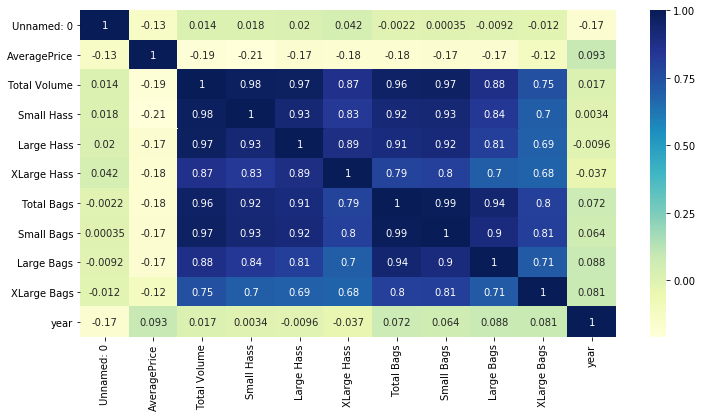

In [10]:
# Ahora lo observaremos en modo gráfico
# El mapa de calor es un excelente alternativa para identificar de forma visual
# las variables que estan mas correlacionadas. se utiliza una codificacion de colores,
# y en la que el color y su intensidad reflejan la correlacion

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

### Preparando variables para el modelo de regresion lineal

In [11]:
# Etiquetando las variables categóricas, usamos variables dummies

Xcat=pd.get_dummies(data[["type","region"]], drop_first = True)

In [12]:
# Variable a predecir
target = data[['AveragePrice']]

In [13]:
# Variables numéricas que se usarán en el modelo

Xnum=data[["Small Hass", "Large Hass", "XLarge Hass", "Small Bags",
           "Large Bags", "XLarge Bags"]]

In [14]:
# Concatenar las Variables dummy (categóricas) y las variables numéricas
X = pd.concat([target, Xcat, Xnum], axis = 1) 

In [15]:
X.head()

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
11569,1.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,9307.34,3844.81,615.28,13061.10,537.36,0.0
9593,1.49,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1189.35,15628.27,0.00,905.55,0.00,0.0
10009,1.68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,161.68,206.96,0.00,2528.08,0.00,0.0
1819,1.52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3013.04,35456.88,1561.70,11264.80,3660.38,0.0
9333,1.64,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1.27,1129.50,0.00,186.67,187.68,0.0


###  Dividir el dataset en un conjunto de entrenamiento y un conjunto de prueba

Para realizar la division de los datasets usaremos una columna adicional **_is_training_** donde aleatoriamente pondremos valores de True y False. 

Usaremos un 70% de los datos para entrenamiento y 
un 30% para la prueba y prediccion

In [16]:
X["is_train"] = np.random.uniform(0,1, len(X)) <= 0.70
X.head()

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,region_TotalUS,region_West,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,is_train
11569,1.75,1,0,0,0,0,0,0,0,0,...,0,0,0,9307.34,3844.81,615.28,13061.10,537.36,0.0,True
9593,1.49,1,0,0,0,0,0,0,0,1,...,0,0,0,1189.35,15628.27,0.00,905.55,0.00,0.0,True
10009,1.68,1,0,0,0,0,0,0,0,0,...,0,0,0,161.68,206.96,0.00,2528.08,0.00,0.0,True
1819,1.52,0,0,0,0,0,0,0,0,0,...,0,0,0,3013.04,35456.88,1561.70,11264.80,3660.38,0.0,True
9333,1.64,1,0,0,1,0,0,0,0,0,...,0,0,0,1.27,1129.50,0.00,186.67,187.68,0.0,False


In [17]:
# Realizamos los 2 datasets e acuerdo al valor aleatorio generado en el paso anterior
train, test = X[X["is_train"]==True] , X[X["is_train"]==False]

In [18]:
# Verificar número de observaciones y variables del dataset de entrenamiento y de prueba

print("Conjunto de Entrenamiento =", train.shape, "Conjunto de Prueba =", test.shape)

Conjunto de Entrenamiento = (12750, 62) Conjunto de Prueba = (5499, 62)


In [19]:
y_train = train['AveragePrice']
y_test  = test['AveragePrice']


In [20]:
X_train = train.drop(['AveragePrice', 'is_train'], axis = 1)
X_test  = test.drop(['AveragePrice', 'is_train'], axis = 1)


In [21]:
X_train.head()

,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
11569,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9307.34,3844.81,615.28,13061.10,537.36,0.0
9593,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1189.35,15628.27,0.00,905.55,0.00,0.0
10009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,161.68,206.96,0.00,2528.08,0.00,0.0
1819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3013.04,35456.88,1561.70,11264.80,3660.38,0.0
2807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,426878.87,147958.43,15267.89,165202.22,2811.54,0.0


## Regresion lineal

In [22]:
#  
Reg = LinearRegression()
Reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
feature_cols = list(X_train)
feature_cols

['type_organic',
 'region_Atlanta',
 'region_BaltimoreWashington',
 'region_Boise',
 'region_Boston',
 'region_BuffaloRochester',
 'region_California',
 'region_Charlotte',
 'region_Chicago',
 'region_CincinnatiDayton',
 'region_Columbus',
 'region_DallasFtWorth',
 'region_Denver',
 'region_Detroit',
 'region_GrandRapids',
 'region_GreatLakes',
 'region_HarrisburgScranton',
 'region_HartfordSpringfield',
 'region_Houston',
 'region_Indianapolis',
 'region_Jacksonville',
 'region_LasVegas',
 'region_LosAngeles',
 'region_Louisville',
 'region_MiamiFtLauderdale',
 'region_Midsouth',
 'region_Nashville',
 'region_NewOrleansMobile',
 'region_NewYork',
 'region_Northeast',
 'region_NorthernNewEngland',
 'region_Orlando',
 'region_Philadelphia',
 'region_PhoenixTucson',
 'region_Pittsburgh',
 'region_Plains',
 'region_Portland',
 'region_RaleighGreensboro',
 'region_RichmondNorfolk',
 'region_Roanoke',
 'region_Sacramento',
 'region_SanDiego',
 'region_SanFrancisco',
 'region_Seattle',
 'reg

In [25]:
print(Reg.intercept_)

1.317600020171637


In [26]:
print("R2 de la Regresión Lineal = " ,Reg.score(X_train,y_train) )

R2 de la Regresión Lineal =  0.5544472665063667


## Predicción

In [28]:
y_pred = Reg.predict(X_test)
y_pred = pd.DataFrame({'Prediccion':y_pred})

In [29]:
# El coeficiente de determinación: 1 es predicción perfecta

print('Coeficiente de determinación: %.2f'
      % r2_score(y_test, y_pred))

Coeficiente de determinación: 0.54


In [30]:
print('MSE, Error medio cuadrado: %.2f' % mean_squared_error(y_test, y_pred))

MSE, Error medio cuadrado: 0.07


In [31]:
print('Coeficientes: \n', Reg.coef_)

Coeficientes: 
 [ 4.94307280e-01 -2.16564770e-01 -3.15291350e-02 -2.00645902e-01
 -3.39871325e-02 -3.80138254e-02 -1.72767448e-01  5.20988283e-02
  3.44785384e-03 -3.79448654e-01 -3.01235566e-01 -4.75336096e-01
 -3.46829500e-01 -2.91365857e-01 -7.16766784e-02 -2.23279955e-01
 -6.78643284e-02  2.55670278e-01 -5.10358973e-01 -2.42244410e-01
 -5.00577645e-02 -1.97932481e-01 -3.48954941e-01 -2.88882113e-01
 -1.43921762e-01 -1.60280175e-01 -3.43568193e-01 -2.70980721e-01
  1.69250162e-01  6.69888626e-02 -8.42717118e-02 -5.73267709e-02
  6.64967699e-02 -3.32985702e-01 -1.97784519e-01 -1.30672873e-01
 -2.44491343e-01 -3.44606556e-03 -2.88082279e-01 -3.25888225e-01
  5.74864784e-02 -1.83682917e-01  2.40271602e-01 -1.17586205e-01
 -1.50487765e-01 -4.46708980e-01 -1.55343763e-01 -1.14285319e-01
 -1.29273483e-01 -4.48108447e-02 -1.75681815e-01 -1.58469593e-01
 -2.54580341e-01 -2.99017371e-01 -6.52939033e-09 -7.61112089e-09
 -1.02110668e-07 -3.40458221e-09 -3.38261601e-08  1.78030925e-06]


In [32]:
# Coeficientes por variables
list(zip(feature_cols, Reg.coef_))

[('type_organic', 0.49430728009562286),
 ('region_Atlanta', -0.21656477000128407),
 ('region_BaltimoreWashington', -0.0315291349799152),
 ('region_Boise', -0.20064590239100485),
 ('region_Boston', -0.033987132475376894),
 ('region_BuffaloRochester', -0.03801382535556451),
 ('region_California', -0.1727674478515821),
 ('region_Charlotte', 0.05209882830100941),
 ('region_Chicago', 0.003447853839989329),
 ('region_CincinnatiDayton', -0.3794486539073141),
 ('region_Columbus', -0.30123556559051795),
 ('region_DallasFtWorth', -0.4753360964369198),
 ('region_Denver', -0.3468294999006141),
 ('region_Detroit', -0.29136585672319065),
 ('region_GrandRapids', -0.0716766783949624),
 ('region_GreatLakes', -0.22327995488734753),
 ('region_HarrisburgScranton', -0.06786432839139332),
 ('region_HartfordSpringfield', 0.25567027823697525),
 ('region_Houston', -0.5103589725139639),
 ('region_Indianapolis', -0.24224441021079648),
 ('region_Jacksonville', -0.050057764539188046),
 ('region_LasVegas', -0.19793

In [33]:
y_test.head()

9333     1.64
10269    1.50
2547     1.15
2131     1.05
1611     1.05
Name: AveragePrice, dtype: float64

In [35]:
# Reseteamos el indice para poder concatenar con la prediccion
y_test = y_test.reset_index()
y_test.drop(['index'], axis='columns', inplace=True)
y_test.head()

,AveragePrice
0,1.64
1,1.50
2,1.15
3,1.05
4,1.05


In [36]:
y_pred.head()

,Prediccion
0,1.611246
1,1.613932
2,1.187106
3,1.371179
4,1.231104


In [37]:
# Concatenamos dataset de prueba y dataset de prediccion para comparacion
testing_results = pd.concat([y_test, y_pred] , axis=1 )

In [39]:
# Visualizamos los primeros 20 registros para compara resultados
testing_results.head(15)

,AveragePrice,Prediccion
0,1.64,1.611246
1,1.50,1.613932
2,1.15,1.187106
3,1.05,1.371179
4,1.05,1.231104
5,1.60,1.740224
6,1.09,1.355741
7,1.11,1.303540
8,1.93,1.981037
9,1.01,1.116114


In [38]:
testing_results.shape

(5499, 2)

### Referencias
* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.
* Russell, S. J., & Norvig, P. (2004). Inteligencia Artificial: un enfoque moderno (No. 04; Q335, R8y 2004.).